In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [152]:
train=pd.read_csv("train.csv")

In [153]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [154]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [155]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


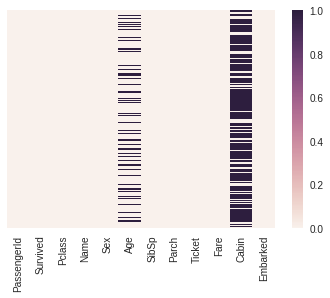

In [156]:
sns.heatmap(train.isnull(),yticklabels=False)

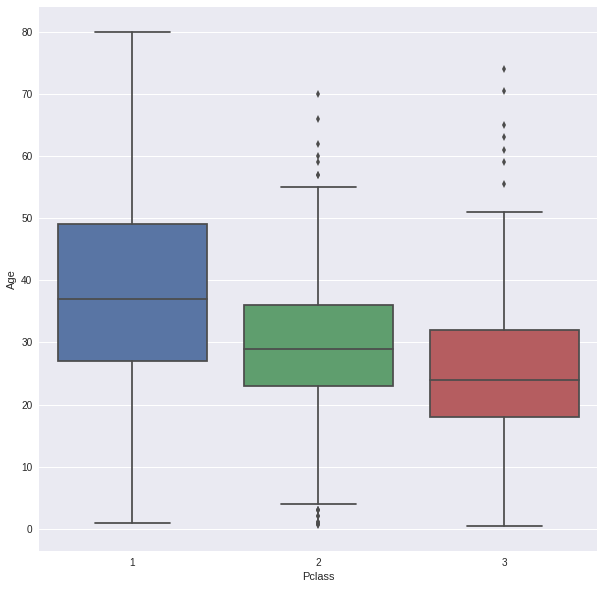

In [157]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Pclass',y='Age',data=train)

In [158]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age) :
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age


In [159]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

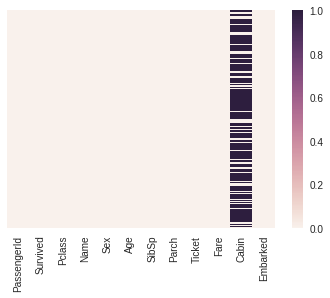

In [160]:
sns.heatmap(train.isnull(),yticklabels=False)

In [161]:
train.drop('Cabin',axis=1,inplace=True)

In [162]:
sex=pd.get_dummies(train['Sex'],drop_first=True)

In [163]:
embarked=pd.get_dummies(train['Embarked'],drop_first=True)

In [164]:
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [165]:
train=pd.concat([train,sex,embarked],axis=1)

In [166]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [167]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [168]:
train.drop(['PassengerId'],axis=1,inplace=True)

In [169]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [170]:
train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [171]:
X=train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']]
y=train[['Survived']]

In [172]:
from sklearn import preprocessing

In [173]:
X=preprocessing.scale(X)


In [174]:
from sklearn.cross_validation import train_test_split
from numpy.linalg  import pinv

In [175]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [176]:
X_train.shape
# y_train.shape
y_train=y_train.as_matrix()
# X_train=X_train.as_matrix()

In [308]:
B=np.random.rand(8,1)
# B=np.array([[20.0],[20.0],[20.0],[20.0],[20.0],[20.0],[20.0],[20.0]])
# B.shape
a=0.000001
epoch=1000

In [309]:
def sigmoid(A):
    z=1.0/(1.0+np.exp((-1)*(A)))
    return z

In [310]:
while epoch>=0:
    for i in range(38):
        z=np.matmul(X_train[i:i+8],B)
        h=sigmoid(z)
        sub=y_train[i:i+8]-h
        sub=sub.reshape(1,8)
        temp=np.matmul(sub,X_train[i:i+8])
        temp=temp.reshape(8,1)
        B=B+(a*temp/712)
    epoch=epoch-1

In [311]:
x=-1*np.matmul(X_test,B)
e=1+np.exp(x)
pred=1/(e)
pred
pred.shape
for i in range(179):
    if pred[i][0]>=0.5:
        pred[i][0]=1
    else:
        pred[i][0]=0

In [312]:
# y_test=y_test.as_matrix()
B

array([[ 0.29190959],
       [ 0.29134927],
       [ 0.46159703],
       [ 0.73208922],
       [ 0.84681308],
       [ 0.16666495],
       [ 0.38069841],
       [ 0.28748677]])

In [313]:
ac=(y_test==pred).sum()
ac/179

0.60893854748603349

In [314]:
from sklearn.metrics import classification_report,confusion_matrix

In [315]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[76 23]
 [47 33]]
             precision    recall  f1-score   support

          0       0.62      0.77      0.68        99
          1       0.59      0.41      0.49        80

avg / total       0.61      0.61      0.60       179



In [352]:
test=pd.read_csv('test.csv')

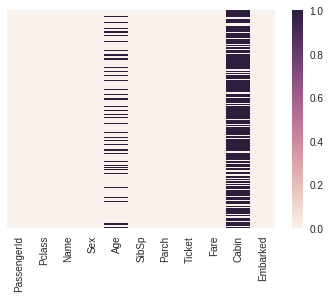

In [353]:
sns.heatmap(test.isnull(),yticklabels=False)

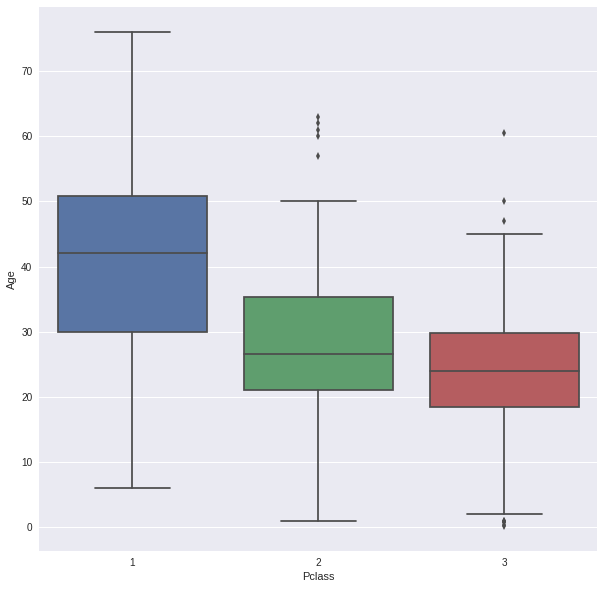

In [318]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Pclass',y='Age',data=test)

In [354]:
def impute_age_2(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age) :
        if Pclass==1:
            return 42
        elif Pclass==2:
            return 26
        else:
            return 24
    else:
        return Age

In [355]:
test['Age'] = test[['Age','Pclass']].apply(impute_age_2,axis=1)

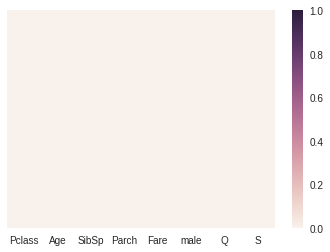

In [346]:
sns.heatmap(test.isnull(),yticklabels=False)

In [356]:
test.drop('Cabin',axis=1,inplace=True)

In [357]:
sex_2=pd.get_dummies(test['Sex'],drop_first=True)

In [358]:
embarked_2=pd.get_dummies(test['Embarked'],drop_first=True)

In [359]:
test=pd.concat([test,sex_2,embarked_2],axis=1)

In [360]:
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [363]:
test.drop(['PassengerId'],axis=1,inplace=True)

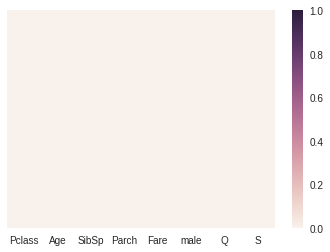

In [364]:
sns.heatmap(test.isnull(),yticklabels=False)

In [365]:
test.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S'], dtype='object')

In [366]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [367]:
X=test[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']]
# X_test_data.head()


In [368]:
from sklearn import preprocessing

In [369]:
X=preprocessing.scale(X)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [333]:
x=-1*np.dot(X_test_data,B)
e=1+np.exp(x)
pred=1/(e)
pred.shape
for i in range(418):
    if pred[i][0]>=0.5:
        pred[i][0]=1
    else:
        pred[i][0]=0

In [334]:
pred

array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
      